# Building a Handwritten Digits Classifier

In this project, we'll build models that can classify handwritten digits.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()
digits_data.keys()

dict_keys(['target', 'data', 'DESCR', 'images', 'target_names'])

In [2]:
# Transform the NumPy 2D array into a pandas dataframe.
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


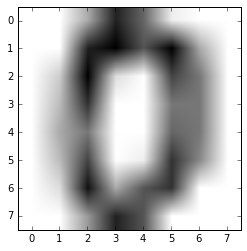

In [3]:
# display first image
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image,  cmap='gray_r')

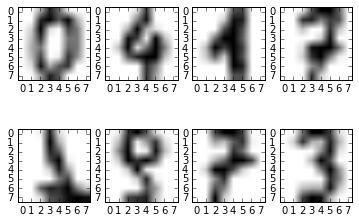

In [4]:
# visualize some other images
fig, ax = plt.subplots(2, 4)

ax[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')

ax[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')

## Train the images using KNeighborsClassifer

Why k-nearest neighbors algorithm?

   Unlike linear and logistic regression model, the k-nearest neighbors algorithm does not make assumptions about the linearity between the features and the output labels. This allows them to capture nonlinearity in the data. 
    
What does k-nearest neighbors do?

* compares every unseen observation in the test set to all/many training observations to look for similar the "nearest" observations
* the label with the most nearby observations
* assigns that as the prediction for the unseen observation

In [5]:
# split the data into train and test set
# Setup a pipeline for testing and training k-nn models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

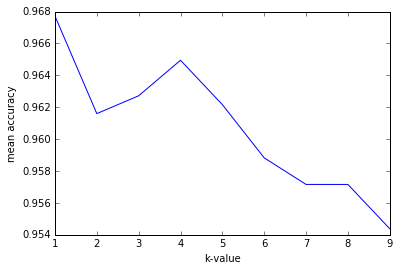

In [6]:
# experience with difference values of k
k = []
knn_accuracy_mean = []
for i in range(1,10):
    k.append(i)
    knn_accuracy_mean.append(np.mean(cross_validate(i)))

plt.plot(k,knn_accuracy_mean,color = 'b')
plt.xlabel('k-value')
plt.ylabel('mean accuracy')

However, there are a few downsides to knn:

* high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
* no model representation to debug and explore

## Neural Network with a Single Hidden Layer

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [ ]:
# Train and test a neural network model 
# using a single hidden layer of 8, 16, 32, 64, 128 and 256 neurons
import matplotlib.pyplot as plt
%matplotlib inline

nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_accuracy_mean = []

for n in nn_one_neurons:
    nn_accuracy_mean.append(np.mean(cross_validate(n)))

plt.figure(figsize=(8,4))
x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_accuracy_mean, color='g')
plt.xlabel('number of neurons')
plt.ylabel('mean accuracy')
plt.show()

print(nn_accuracy_mean)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



From the charts above, we can see that Adding more neurons to a single hidden layer vastly improved the classification accuracy. However, simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

And since k-nearest neighbors achieved approximately 96% accuracy already, there's no need to use a single hidden layer neural network for this problem.

## Two Hidden Layers

In [ ]:
nn_two_neurons = [
    (64,64)
]
nn_two_accuracy_mean = []

for n in nn_two_neurons:
    nn_two_accuracy_mean.append(np.mean(cross_validate(n)))

plt.figure(figsize=(8,4))
x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracy_mean, color='r')
plt.xlabel('number of neurons')
plt.ylabel('mean accuracy')
plt.show()

print(nn_two_accuracy_mean)

## Three hidden layers

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test_nn(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [ ]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128),
]
nn_three_accuracy_mean = []

for n in nn_three_neurons:
   nn_three_accuracy_mean.append(np.mean(cross_validate(n)))

plt.figure(figsize=(8,4))
x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracy_mean, color='y')
plt.xlabel('number of neurons')
plt.ylabel('mean accuracy')
plt.show()

print(nn_three_accuracy_mean)